In [407]:
# importing common libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.model_selection import train_test_split
import plotly.express as px


# warnings
import warnings
warnings.filterwarnings('ignore')

## Data preparation and preprocessing

In [408]:
# load dataset
path = r'C:\Users\kalema\Desktop\Recess\resources\datasets\MalariaAfricaDataset.csv'
dataset = pd.read_csv(path)
df = pd.DataFrame(dataset)
df.head(10)

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
5,Burundi,2007,BDI,222.92,1101644.0,NaN,NaN,NaN,NaN,NaN,...,5.82,54.73,51.39,85.24,45.91,46.26,42.78,-3.373056,29.918886,POINT (-3.373056 29.918886)
6,Cabo Verde,2007,CPV,0.15,18.0,NaN,NaN,NaN,NaN,NaN,...,2.66,81.39,71.02,88.48,54.85,38.90,65.77,16.002082,-24.013197,POINT (16.002082 -24.013197)
7,Cameroon,2007,CMR,386.68,0.0,NaN,NaN,NaN,NaN,NaN,...,3.96,60.09,38.85,81.55,39.25,23.01,55.66,7.369722,12.354722,POINT (7.369722 12.354722)
8,Central African Republic,2007,CAF,471.11,0.0,NaN,NaN,NaN,NaN,NaN,...,2.30,51.10,38.18,71.87,20.55,8.76,39.50,6.611111,20.939444,POINT (6.611111 20.939444)
9,Chad,2007,TCD,210.71,48288.0,NaN,NaN,NaN,NaN,NaN,...,3.55,40.34,30.88,74.12,11.15,5.75,30.45,15.454166,18.732207,POINT (15.454166 18.732207)


In [409]:
# number of rows and columns
number_of_columns = df.shape[1]
number_of_rows = df.shape[0]
print(f'Number of columns: {number_of_columns}')
print(f'Number of rows: {number_of_rows}')

Number of columns: 27
Number of rows: 594


In [410]:
# Column names
df.columns

Index(['Country Name', 'Year', 'Country Code',
       'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported',
       'Use of insecticide-treated bed nets (% of under-5 population)',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'People using safely managed drinking water services (% of population)',
       'People using safely managed drinking water services, rural (% of rural population)',
       'People using safely managed drinking water services, urban (% of urban population)',
       'People using safely managed sanitation services (% of population)',
       'People using safely managed sanitation services, rural (% of rural population)',
       'People using safely managed sanitation services, urban  (% of urban population)',
       'Rural population (% of total population)',
       'Rural popula

In [411]:
# column datatypes
df.dtypes

Country Name                                                                                object
Year                                                                                         int64
Country Code                                                                                object
Incidence of malaria (per 1,000 population at risk)                                        float64
Malaria cases reported                                                                     float64
Use of insecticide-treated bed nets (% of under-5 population)                              float64
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    float64
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      float64
People using safely managed drinking water services (% of population)                      float64
People using safely managed drinking water services, rural (% of rural population)         float64
People usi

In [412]:
# Converting year datatype to datetime
df['Year'] = pd.to_datetime(df.Year,format='%Y').dt.year
df.dtypes

Country Name                                                                                object
Year                                                                                         int64
Country Code                                                                                object
Incidence of malaria (per 1,000 population at risk)                                        float64
Malaria cases reported                                                                     float64
Use of insecticide-treated bed nets (% of under-5 population)                              float64
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    float64
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      float64
People using safely managed drinking water services (% of population)                      float64
People using safely managed drinking water services, rural (% of rural population)         float64
People usi

In [413]:
# Renaming columns
new_column_names = {
    'Country Name': 'Country',
    'Year': 'Year',
    'Country code': 'Country_code',
    'Malaria cases reported': 'Reported_cases',
    'Incidence of malaria (per 1,000 population at risk)': 'Incidences_per_1000_population_at_risk',
    'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)': '%_of_pregnant_women_using_IPT',
    'Use of insecticide-treated bed nets (% of under-5 population)': '%_using_IBNs',
    'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)': '%_of_children_under_age_5_with_fever',
    'Rural population (% of total population)': '%_of_rural_population',
    'Urban population (% of total population)': '%_of_urban_population',
    'Rural population growth (annual %)': 'annual_%_growth_of_rural_population',
    'Urban population growth (annual %)': 'annual_%_growth_of_urban_population',
    'People using safely managed sanitation services (% of population)': '%_using_safe_sanity_services',
    'People using safely managed sanitation services, urban  (% of urban population)': '%_of_urban_using_safe_sanity_services',
    'People using safely managed sanitation services, rural (% of rural population)': '%_of_rural_using_safe_sanity_services',
    'People using at least basic sanitation services (% of population)': '%_using_atleast_basic_sanity_services',
    'People using at least basic sanitation services, urban  (% of urban population)': '%_of_urban_using_atleast_basic_sanity_services',
    'People using at least basic sanitation services, rural (% of rural population)': '%_of_rural_using_atleast_basic_sanity_services',
    'People using at least basic drinking water services (% of population)': '%_using_atleast_basic_drinking_water_services',
    'People using at least basic drinking water services, urban (% of urban population)': '%_of_urban_using_atleast_basic_drinking_water_services',
    'People using at least basic drinking water services, rural (% of rural population)': '%_of_rural_using_atleast_basic_drinking_water_services',
    'People using safely managed drinking water services (% of population)': '%_using_safe_drinking_water_services',
    'People using safely managed drinking water services, urban (% of urban population)': '%_of_urban_using_safe_drinking_water_services',
    'People using safely managed drinking water services, rural (% of rural population)': '%_of_rural_using_safe_drinking_water_services',
    'longitude': 'longitude',
    'latitude': 'latitude',
    'geometry': 'geometry'
}

df.rename(columns=new_column_names, inplace=True)


In [414]:
# Review changes
df.columns

Index(['Country', 'Year', 'Country Code',
       'Incidences_per_1000_population_at_risk', 'Reported_cases',
       '%_using_IBNs', '%_of_children_under_age_5_with_fever',
       '%_of_pregnant_women_using_IPT', '%_using_safe_drinking_water_services',
       '%_of_rural_using_safe_drinking_water_services',
       '%_of_urban_using_safe_drinking_water_services',
       '%_using_safe_sanity_services', '%_of_rural_using_safe_sanity_services',
       '%_of_urban_using_safe_sanity_services', '%_of_rural_population',
       'annual_%_growth_of_rural_population', '%_of_urban_population',
       'annual_%_growth_of_urban_population',
       '%_using_atleast_basic_drinking_water_services',
       '%_of_rural_using_atleast_basic_drinking_water_services',
       '%_of_urban_using_atleast_basic_drinking_water_services',
       '%_using_atleast_basic_sanity_services',
       '%_of_rural_using_atleast_basic_sanity_services',
       '%_of_urban_using_atleast_basic_sanity_services', 'latitude',
      

In [415]:
# number of missing values per column in descending order
number_of_missing_values = df.isnull().sum().sort_values(ascending=False)
number_of_missing_values

%_of_rural_using_safe_drinking_water_services             506
%_using_safe_drinking_water_services                      495
%_of_pregnant_women_using_IPT                             488
%_of_rural_using_safe_sanity_services                     484
%_of_children_under_age_5_with_fever                      472
%_of_urban_using_safe_sanity_services                     462
%_using_safe_sanity_services                              462
%_using_IBNs                                              462
%_of_urban_using_safe_drinking_water_services             418
Reported_cases                                             44
Incidences_per_1000_population_at_risk                     44
%_of_urban_using_atleast_basic_sanity_services             28
%_of_rural_using_atleast_basic_drinking_water_services     28
%_of_urban_using_atleast_basic_drinking_water_services     28
%_of_rural_using_atleast_basic_sanity_services             28
%_of_rural_population                                       6
annual_%

In [416]:
# Percentage of null values per column in descending order
percentage_of_missing_values = (df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
percentage_of_missing_values = percentage_of_missing_values.apply(lambda x: f'{x:.2f}%')
percentage_of_missing_values

%_of_rural_using_safe_drinking_water_services             85.19%
%_using_safe_drinking_water_services                      83.33%
%_of_pregnant_women_using_IPT                             82.15%
%_of_rural_using_safe_sanity_services                     81.48%
%_of_children_under_age_5_with_fever                      79.46%
%_of_urban_using_safe_sanity_services                     77.78%
%_using_safe_sanity_services                              77.78%
%_using_IBNs                                              77.78%
%_of_urban_using_safe_drinking_water_services             70.37%
Reported_cases                                             7.41%
Incidences_per_1000_population_at_risk                     7.41%
%_of_urban_using_atleast_basic_sanity_services             4.71%
%_of_rural_using_atleast_basic_drinking_water_services     4.71%
%_of_urban_using_atleast_basic_drinking_water_services     4.71%
%_of_rural_using_atleast_basic_sanity_services             4.71%
%_of_rural_population    

Checking for rows where the sum of '%_of_rural_population' and '%_of_urban_population' is not equal to 100

In [417]:
# Obtain sum of %_of_rural_population and %_of_urban_population
df['%_of_total_population'] = df[['%_of_rural_population', '%_of_urban_population']].sum(axis=1)
# Checking for rows where %_of_rural_population + %_of_urban_population is not equal to 100
invalid_total_population = df[(df['%_of_rural_population'].notnull()) & (df['%_of_urban_population'].notnull()) &
                             (df['%_of_rural_population'] + df['%_of_urban_population'] != 100)].reset_index(drop=True)

print(f'Number of such rows: {invalid_total_population.shape[0]}')
    
invalid_total_population[['Country', 'Year', '%_of_rural_population', '%_of_urban_population', '%_of_total_population']]

Number of such rows: 45


,Country,Year,%_of_rural_population,%_of_urban_population,%_of_total_population
0,Malawi,2007,84.77,15.24,100.01
1,Senegal,2007,57.47,42.54,100.01
2,Seychelles,2007,47.72,52.29,100.01
3,Equatorial Guinea,2008,37.26,62.75,100.01
4,Eswatini,2008,77.96,22.05,100.01
5,Guinea-Bissau,2008,60.68,39.33,100.01
6,Rwanda,2008,83.08,16.93,100.01
7,South Sudan,2008,82.45,17.56,100.01
8,Gabon,2009,15.05,84.96,100.01
9,Liberia,2009,52.56,47.45,100.01


Algorithm to normalize the '%_of_rural_population' and '%_of_urban_population' columns for rows where the sum is not 100.

In [418]:
# Algorithm to normalize %_of_rural_population and %_of_urban_population where the total population percentage is not 100
def normalize_percentages(df):
    for index, row in df.iterrows():
        if pd.notnull(row['%_of_rural_population']) and pd.notnull(row['%_of_urban_population']) and \
                (row['%_of_rural_population'] + row['%_of_urban_population'] != 100):
            # Calculate normalized values
            normalized_rural_percentage = (row['%_of_rural_population'] / (row['%_of_rural_population'] + row['%_of_urban_population'])) * 100
            normalized_urban_percentage = (row['%_of_urban_population'] / (row['%_of_rural_population'] + row['%_of_urban_population'])) * 100
            # Round to 2 decimal places
            normalized_rural_percentage = round(normalized_rural_percentage, 2)
            normalized_urban_percentage = round(normalized_urban_percentage, 2)
            # Assign the values to new columns
            df.at[index, '%_of_rural_population'] = normalized_rural_percentage
            df.at[index, '%_of_urban_population'] = normalized_urban_percentage
    return df

df = normalize_percentages(df)

Review normalization results

In [419]:
# Checking for rows where %_of_rural_population + %_of_urban_population is not equal to 100
new_invalid_total_population = df[(df['%_of_rural_population'].notnull()) & (df['%_of_urban_population'].notnull()) &
                             (df['%_of_rural_population'] + df['%_of_urban_population'] != 100)].reset_index(drop=True)

print(f'Number of such rows: {new_invalid_total_population.shape[0]}')
    
new_invalid_total_population[['Country', 'Year', '%_of_rural_population', '%_of_urban_population', '%_of_total_population']]

Number of such rows: 0


,Country,Year,%_of_rural_population,%_of_urban_population,%_of_total_population


Fill cells where values are "Missing At Random", which means that their values can be determined using values from other columns.

The algorithm is based off of four equations which represent a mathematical relationship between some of the columns as shown below.
1. %_using_safe_sanity_services = (%_of_rural_using_safe_sanity_services * %_of_rural_population) + (%_of_urban_using_safe_sanity_services * %_of_urban_population)/100

2. %_using_atleast_basic_drinking_water_services = (%_of_rural_using_atleast_basic_drinking_water_services * %_of_rural_population) + (%_of_urban_using_atleast_basic_drinking_water_services * %_of_urban_population)/100

3. %_using_atleast_basic_sanity_services = (%_of_rural_using_atleast_basic_sanity_services * %_of_rural_population) + (%_of_urban_using_atleast_basic_sanity_services * %_of_urban_population)/100

4. %_using_safe_drinking_water_services = (%_of_rural_using_safe_drinking_water_services * %_of_rural_population) + (%_of_urban_using_safe_drinking_water_services * %_of_urban_population)/100

Eritrea is the only country with null values in the '%_of_rural_population' and '%_of_urban_population' columns, which can be calculated using values provided in the columns '%_using_atleast_basic_sanity_services', '%_of_rural_using_atleast_basic_sanity_services', '%_of_urban_using_atleast_basic_sanity_services', '%_using_atleast_basic_drinking_water_services', '%_of_rural_using_atleast_basic_drinking_water_services', and '%_of_urban_using_atleast_basic_drinking_water_services'

Eritrea is also the only contry with null values in the 'annual_&#37;\_growth_of_rural_population' and 'annual\_&#37;_growth_of_urban_population' columns
 

In [420]:
# Obtain rows where the country is Eritrea
eritrea = df[df['Country'] == 'Eritrea'].reset_index(drop=True)
# Display population percentages
eritrea[['Country', 'Year', '%_of_rural_population', '%_of_urban_population', 'annual_%_growth_of_rural_population', 'annual_%_growth_of_urban_population']]


,Country,Year,%_of_rural_population,%_of_urban_population,annual_%_growth_of_rural_population,annual_%_growth_of_urban_population
0,Eritrea,2007,66.98,33.02,1.22,5.62
1,Eritrea,2008,66.00,34.00,0.71,5.12
2,Eritrea,2009,65.41,34.59,0.96,3.55
3,Eritrea,2010,64.82,35.18,0.70,3.30
4,Eritrea,2011,64.23,35.77,0.44,3.04
5,Eritrea,2012,NaN,NaN,NaN,NaN
6,Eritrea,2013,NaN,NaN,NaN,NaN
7,Eritrea,2014,NaN,NaN,NaN,NaN
8,Eritrea,2015,NaN,NaN,NaN,NaN
9,Eritrea,2016,NaN,NaN,NaN,NaN


Algorithm to fill the %_of_rural_population and %_of_urban_population columns.

In [421]:

def fill_missing_percentage_population(df):
    for index, row in df.iterrows():
        if pd.notnull(row['%_using_atleast_basic_drinking_water_services']) and pd.notnull(row['%_of_rural_using_atleast_basic_drinking_water_services']) \
            and pd.notnull(row['%_of_urban_using_atleast_basic_drinking_water_services']) and pd.notnull(row['%_using_atleast_basic_sanity_services']) \
            and pd.notnull(row['%_of_rural_using_atleast_basic_sanity_services']) and pd.notnull(row['%_of_urban_using_atleast_basic_sanity_services']) and \
            pd.isnull(row['%_of_rural_population']) and pd.isnull(row['%_of_urban_population']):

            coefficients = [[row['%_of_rural_using_atleast_basic_drinking_water_services']/100, row['%_of_urban_using_atleast_basic_drinking_water_services']/100],
                                     [row['%_of_rural_using_atleast_basic_sanity_services']/100, row['%_of_urban_using_atleast_basic_sanity_services']/100]]
            constants = [row['%_using_atleast_basic_drinking_water_services'], row['%_using_atleast_basic_sanity_services']]
            
            try:
                # Try to solve the system using the regular solve() function
                solution = np.linalg.solve(coefficients, constants)
                rural_population_percentage = float(format(solution[0], '.2f'))
                urban_population_percentage = float(format(solution[1], '.2f'))

            except np.linalg.LinAlgError as e:
                # If the matrix is singular, use the inverse instead
                print(f"Warning: {e}")
                inverse = np.linalg.pinv(coefficients)
                solution = np.dot(inverse, constants)
                rural_population_percentage = float(format(solution[0], '.2f'))
                urban_population_percentage = float(format(solution[1], '.2f'))

            if (rural_population_percentage + urban_population_percentage) != 100:
                 # Calculate normalized values
                normalized_rural_percentage = (rural_population_percentage / (rural_population_percentage + urban_population_percentage)) * 100
                normalized_urban_percentage = (urban_population_percentage / (rural_population_percentage + urban_population_percentage)) * 100
                # Round to 2 decimal places
                normalized_rural_percentage = round(normalized_rural_percentage, 2)
                normalized_urban_percentage = round(normalized_urban_percentage, 2)
                # Assign the values to new columns
                df.at[index, '%_of_rural_population'] = normalized_rural_percentage
                df.at[index, '%_of_urban_population'] = normalized_urban_percentage
            else:
                df.at[index, '%_of_rural_population'] = rural_population_percentage
                df.at[index, '%_of_urban_population'] = urban_population_percentage
        
        # For rows with no values for '%_of_rural_using_atleast_basic_drinking_water_services', '%_of_urban_using_atleast_basic_drinking_water_services',
        # '%_of_rural_using_atleast_basic_sanity_services', and '%_of_urban_using_atleast_basic_sanity_services' insert 0's because they can't be calculated
        if pd.notnull(row['%_using_atleast_basic_drinking_water_services']) and pd.isnull(row['%_of_rural_using_atleast_basic_drinking_water_services']) \
            and pd.isnull(row['%_of_urban_using_atleast_basic_drinking_water_services']) and pd.notnull(row['%_using_atleast_basic_sanity_services']) \
            and pd.isnull(row['%_of_rural_using_atleast_basic_sanity_services']) and pd.isnull(row['%_of_urban_using_atleast_basic_sanity_services']) and \
            pd.notnull(row['%_of_rural_population']) and pd.notnull(row['%_of_urban_population']):

            df.at[index, '%_of_rural_using_atleast_basic_drinking_water_services'] = 0.00
            df.at[index, '%_of_urban_using_atleast_basic_drinking_water_services'] = 0.00
            df.at[index, '%_of_rural_using_atleast_basic_sanity_services'] = 0.00
            df.at[index, '%_of_urban_using_atleast_basic_sanity_services'] = 0.00

    return df        

            
df = fill_missing_percentage_population(df)

We can now see that '%_of_rural_population' and '%_of_urban_population' have been filled.

The last row, however, still has null values because '%_using_atleast_basic_drinking_water_services', '%_of_rural_using_atleast_basic_drinking_water_services', '%_of_urban_using_atleast_basic_drinking_water_services', '%_using_atleast_basic_sanity_services', '%_of_rural_using_atleast_basic_sanity_services', '%_of_urban_using_atleast_basic_sanity_services' are null and yet these are the values required by the algorithm to calculate the '%_of_rural_population' and '%_of_urban_population'

In [422]:
# Obtain rows where the country is Eritrea
eritrea = df[df['Country'] == 'Eritrea'].reset_index(drop=True)
# Display population percentages
print("One row still has null values for '%_of_rural_population' and '%_of_urban_population' because the columns whose values are used to calculate them were null")
eritrea[['Country', 'Year', '%_of_rural_population', '%_of_urban_population', 'annual_%_growth_of_rural_population', 'annual_%_growth_of_urban_population']]

One row still has null values for '%_of_rural_population' and '%_of_urban_population' because the columns whose values are used to calculate them were null


,Country,Year,%_of_rural_population,%_of_urban_population,annual_%_growth_of_rural_population,annual_%_growth_of_urban_population
0,Eritrea,2007,66.98,33.02,1.22,5.62
1,Eritrea,2008,66.00,34.00,0.71,5.12
2,Eritrea,2009,65.41,34.59,0.96,3.55
3,Eritrea,2010,64.82,35.18,0.70,3.30
4,Eritrea,2011,64.23,35.77,0.44,3.04
5,Eritrea,2012,63.46,36.54,NaN,NaN
6,Eritrea,2013,62.88,37.12,NaN,NaN
7,Eritrea,2014,62.20,37.80,NaN,NaN
8,Eritrea,2015,61.72,38.28,NaN,NaN
9,Eritrea,2016,61.15,38.85,NaN,NaN


We realised that we are working with time-series data, which means that the data contains trends or patterns which are clearly visible to the naked eye.

Mean and mode imputation were therefore not an option because they would introduce biases and affect existing trends or patterns.

We developed an algorithm that utilises regression, to predict and fill the missing values.

In [423]:
all_columns = df.columns
def fill_with_regression(original_dataframe, new_dataframe, target_column, feature_column):
    # Filter rows with available data to train the model
    df_train = new_dataframe.dropna(subset=[target_column])

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model
    X_train = df_train[feature_column].to_numpy().reshape(-1, 1)
    y_train = df_train[target_column].to_numpy()
    model.fit(X_train, y_train)

    # Predict the missing values
    X_pred = new_dataframe[new_dataframe[target_column].isnull()][feature_column].to_numpy().reshape(-1, 1)
    y_pred = model.predict(X_pred)

    # Update the DataFrame with the rounded predicted values
    new_dataframe.loc[new_dataframe[target_column].isnull(), target_column] = y_pred

    # Round off to 2 decimal places
    new_dataframe[target_column] = new_dataframe[target_column].round(2)

    # merging the original dataframe with the dataframe containing filled in values 
    merged_df = pd.merge(original_dataframe, new_dataframe, on=['Country', "Country Code", 'Year'], how='left')

    exclude_columns = ['Country', 'Year', 'Country Code']

    for column in all_columns:
        if column not in exclude_columns:
            # Add data from the eritrea dataframe where it is missing in the original dataframe
            merged_df[column] = np.where(
            (merged_df[column + '_x'].isnull()) &
            (~merged_df[column + '_y'].isnull()),
            merged_df[column + '_y'],
            merged_df[column + '_x']
            )
            # Delete the unnecessary columns
            merged_df = merged_df.drop([column + '_x', column + '_y'], axis=1)

    # Calculate MSE and R-squared for the model
    mse = round(mean_squared_error(y_train, model.predict(X_train)), 2)
    r_squared = round(r2_score(y_train, model.predict(X_train)), 2)

    return merged_df, mse, r_squared, target_column

eritrea_columns = ['%_of_rural_population', '%_of_urban_population','annual_%_growth_of_rural_population', 'annual_%_growth_of_urban_population']

for column in eritrea_columns:
    df, mse, r_squared, target_column = fill_with_regression(df, eritrea, column, 'Year')
    print(f'The Mean Squared Error for the model used to predict {target_column} values is: {mse}')
    print(f'The r_squared for the model used to predict {target_column} values is: {r_squared}')
    print("")

print('All missing values have been filled')

eritrea[['Country', 'Year', '%_of_rural_population', '%_of_urban_population', 'annual_%_growth_of_rural_population', 'annual_%_growth_of_urban_population']]


The Mean Squared Error for the model used to predict %_of_rural_population values is: 0.01
The r_squared for the model used to predict %_of_rural_population values is: 1.0

The Mean Squared Error for the model used to predict %_of_urban_population values is: 0.01
The r_squared for the model used to predict %_of_urban_population values is: 1.0

The Mean Squared Error for the model used to predict annual_%_growth_of_rural_population values is: 0.02
The r_squared for the model used to predict annual_%_growth_of_rural_population values is: 0.71

The Mean Squared Error for the model used to predict annual_%_growth_of_urban_population values is: 0.11
The r_squared for the model used to predict annual_%_growth_of_urban_population values is: 0.9

All missing values have been filled


,Country,Year,%_of_rural_population,%_of_urban_population,annual_%_growth_of_rural_population,annual_%_growth_of_urban_population
0,Eritrea,2007,66.98,33.02,1.22,5.62
1,Eritrea,2008,66.00,34.00,0.71,5.12
2,Eritrea,2009,65.41,34.59,0.96,3.55
3,Eritrea,2010,64.82,35.18,0.70,3.30
4,Eritrea,2011,64.23,35.77,0.44,3.04
5,Eritrea,2012,63.46,36.54,0.33,2.03
6,Eritrea,2013,62.88,37.12,0.18,1.33
7,Eritrea,2014,62.20,37.80,0.02,0.64
8,Eritrea,2015,61.72,38.28,-0.14,-0.06
9,Eritrea,2016,61.15,38.85,-0.29,-0.76


Missing values for '%\_of_rural_population', '%\_of_rural_population', 'annual_%\_growth_of_rural_population' and 'annual\_%_growth_of_urban_population' have been filled.

We then went ahead to fill missing values for '%\_of_urban_using_atleast_basic_sanity_services', '%\_of_rural_using_atleast_basic_drinking_water_services', '%\_of_urban_using_atleast_basic_drinking_water_services', '%\_of_rural_using_atleast_basic_sanity_services', '%_using_atleast_basic_drinking_water_services', '%_using_atleast_basic_sanity_services'   

South Sudan, Eritrea and Central African Republic have rows with no data for these columns.

We again noticed trends in this data and therefore, regression imputation was used.

    

In [424]:
South_Sudan = df[df['Country'] == "South Sudan"]
South_Sudan[['Country', '%_using_atleast_basic_sanity_services', '%_using_atleast_basic_drinking_water_services', '%_of_rural_using_atleast_basic_drinking_water_services', '%_of_urban_using_atleast_basic_drinking_water_services', '%_of_rural_using_atleast_basic_sanity_services', '%_of_urban_using_atleast_basic_sanity_services']].reset_index(drop=True)

,Country,%_using_atleast_basic_sanity_services,%_using_atleast_basic_drinking_water_services,%_of_rural_using_atleast_basic_drinking_water_services,%_of_urban_using_atleast_basic_drinking_water_services,%_of_rural_using_atleast_basic_sanity_services,%_of_urban_using_atleast_basic_sanity_services
0,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN
1,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN
2,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN
3,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN
4,South Sudan,6.63,41.09,38.68,52.01,3.95,18.81
5,South Sudan,7.31,41.09,38.21,54.05,4.16,21.50
6,South Sudan,8.04,41.07,37.67,56.13,4.36,24.31
7,South Sudan,8.80,41.01,37.07,58.24,4.57,27.26
8,South Sudan,9.60,40.93,36.40,60.40,4.78,30.33
9,South Sudan,10.44,40.81,35.67,62.59,4.99,33.53


In [425]:

null_columns = ['%_using_atleast_basic_drinking_water_services', '%_using_atleast_basic_sanity_services', '%_of_rural_using_atleast_basic_drinking_water_services', '%_of_urban_using_atleast_basic_drinking_water_services',
               '%_of_rural_using_atleast_basic_sanity_services', '%_of_urban_using_atleast_basic_sanity_services']
for column in null_columns:
    df, mse, r_squared, target_column = fill_with_regression(df, South_Sudan, column, 'Year')
    print(f'The Mean Squared Error for the model used to predict {target_column} values is: {mse}')
    print(f'The r_squared for the model used to predict {target_column} values is: {r_squared}')
    print('')

print("All specified columns with missing values have been filled ")

South_Sudan[['Country', '%_using_atleast_basic_sanity_services', '%_using_atleast_basic_drinking_water_services', '%_of_rural_using_atleast_basic_drinking_water_services', '%_of_urban_using_atleast_basic_drinking_water_services', 
             '%_of_rural_using_atleast_basic_sanity_services', '%_of_urban_using_atleast_basic_sanity_services']].reset_index(drop=True)

The Mean Squared Error for the model used to predict %_using_atleast_basic_drinking_water_services values is: 0.0
The r_squared for the model used to predict %_using_atleast_basic_drinking_water_services values is: 0.89

The Mean Squared Error for the model used to predict %_using_atleast_basic_sanity_services values is: 0.0
The r_squared for the model used to predict %_using_atleast_basic_sanity_services values is: 1.0

The Mean Squared Error for the model used to predict %_of_rural_using_atleast_basic_drinking_water_services values is: 0.01
The r_squared for the model used to predict %_of_rural_using_atleast_basic_drinking_water_services values is: 0.99

The Mean Squared Error for the model used to predict %_of_urban_using_atleast_basic_drinking_water_services values is: 0.0
The r_squared for the model used to predict %_of_urban_using_atleast_basic_drinking_water_services values is: 1.0

The Mean Squared Error for the model used to predict %_of_rural_using_atleast_basic_sanity_servic

,Country,%_using_atleast_basic_sanity_services,%_using_atleast_basic_drinking_water_services,%_of_rural_using_atleast_basic_drinking_water_services,%_of_urban_using_atleast_basic_drinking_water_services,%_of_rural_using_atleast_basic_sanity_services,%_of_urban_using_atleast_basic_sanity_services
0,South Sudan,3.40,41.44,41.38,43.37,3.12,6.45
1,South Sudan,4.19,41.37,40.74,45.51,3.33,9.46
2,South Sudan,4.97,41.30,40.11,47.64,3.54,12.47
3,South Sudan,5.75,41.23,39.48,49.78,3.74,15.48
4,South Sudan,6.63,41.09,38.68,52.01,3.95,18.81
5,South Sudan,7.31,41.09,38.21,54.05,4.16,21.50
6,South Sudan,8.04,41.07,37.67,56.13,4.36,24.31
7,South Sudan,8.80,41.01,37.07,58.24,4.57,27.26
8,South Sudan,9.60,40.93,36.40,60.40,4.78,30.33
9,South Sudan,10.44,40.81,35.67,62.59,4.99,33.53


In [426]:
# Obtain rows where the country is Eritrea
eritrea = df[df['Country'] == 'Eritrea'].reset_index(drop=True)
# Display population percentages
print("One row has null values for these columns")
eritrea[['Country', 'Year', '%_using_atleast_basic_sanity_services', '%_using_atleast_basic_drinking_water_services', '%_of_rural_using_atleast_basic_drinking_water_services', '%_of_urban_using_atleast_basic_drinking_water_services',
          '%_of_rural_using_atleast_basic_sanity_services', '%_of_urban_using_atleast_basic_sanity_services']]

One row has null values for these columns


,Country,Year,%_using_atleast_basic_sanity_services,%_using_atleast_basic_drinking_water_services,%_of_rural_using_atleast_basic_drinking_water_services,%_of_urban_using_atleast_basic_drinking_water_services,%_of_rural_using_atleast_basic_sanity_services,%_of_urban_using_atleast_basic_sanity_services
0,Eritrea,2007,10.56,49.25,29.13,90.06,3.82,24.21
1,Eritrea,2008,10.83,49.65,28.86,89.99,4.17,23.77
2,Eritrea,2009,11.02,49.81,28.60,89.93,4.52,23.33
3,Eritrea,2010,11.20,49.98,28.33,89.87,4.86,22.88
4,Eritrea,2011,11.37,50.15,28.07,89.80,5.21,22.44
5,Eritrea,2012,11.54,50.33,27.80,89.74,5.56,21.99
6,Eritrea,2013,11.64,50.71,27.80,89.74,5.56,21.99
7,Eritrea,2014,11.74,51.08,27.80,89.74,5.56,21.99
8,Eritrea,2015,11.84,51.47,27.80,89.74,5.56,21.99
9,Eritrea,2016,11.94,51.85,27.80,89.74,5.56,21.99


In [427]:
for column in null_columns:
    df, mse, r_squared, target_column = fill_with_regression(df, eritrea, column, 'Year')
    print(f'The Mean Squared Error for the model used to predict {target_column} values is: {mse}')
    print(f'The r_squared for the model used to predict {target_column} values is: {r_squared}')
    print('')
    
print("All specified columns with missing values have been filled using regression")

eritrea[['Country', '%_using_atleast_basic_sanity_services', '%_using_atleast_basic_drinking_water_services', '%_of_rural_using_atleast_basic_drinking_water_services', '%_of_urban_using_atleast_basic_drinking_water_services', 
             '%_of_rural_using_atleast_basic_sanity_services', '%_of_urban_using_atleast_basic_sanity_services']].reset_index(drop=True)

The Mean Squared Error for the model used to predict %_using_atleast_basic_drinking_water_services values is: 0.02
The r_squared for the model used to predict %_using_atleast_basic_drinking_water_services values is: 0.97

The Mean Squared Error for the model used to predict %_using_atleast_basic_sanity_services values is: 0.01
The r_squared for the model used to predict %_using_atleast_basic_sanity_services values is: 0.97

The Mean Squared Error for the model used to predict %_of_rural_using_atleast_basic_drinking_water_services values is: 0.04
The r_squared for the model used to predict %_of_rural_using_atleast_basic_drinking_water_services values is: 0.84

The Mean Squared Error for the model used to predict %_of_urban_using_atleast_basic_drinking_water_services values is: 0.0
The r_squared for the model used to predict %_of_urban_using_atleast_basic_drinking_water_services values is: 0.84

The Mean Squared Error for the model used to predict %_of_rural_using_atleast_basic_sanity_se

,Country,%_using_atleast_basic_sanity_services,%_using_atleast_basic_drinking_water_services,%_of_rural_using_atleast_basic_drinking_water_services,%_of_urban_using_atleast_basic_drinking_water_services,%_of_rural_using_atleast_basic_sanity_services,%_of_urban_using_atleast_basic_sanity_services
0,Eritrea,10.56,49.25,29.13,90.06,3.82,24.21
1,Eritrea,10.83,49.65,28.86,89.99,4.17,23.77
2,Eritrea,11.02,49.81,28.60,89.93,4.52,23.33
3,Eritrea,11.20,49.98,28.33,89.87,4.86,22.88
4,Eritrea,11.37,50.15,28.07,89.80,5.21,22.44
5,Eritrea,11.54,50.33,27.80,89.74,5.56,21.99
6,Eritrea,11.64,50.71,27.80,89.74,5.56,21.99
7,Eritrea,11.74,51.08,27.80,89.74,5.56,21.99
8,Eritrea,11.84,51.47,27.80,89.74,5.56,21.99
9,Eritrea,11.94,51.85,27.80,89.74,5.56,21.99


In [428]:
central_african_republic = df[df['Country'] == 'Central African Republic'].reset_index(drop=True)
# Display population percentages
print("One row has null values for these columns")
central_african_republic[['Country', 'Year', '%_using_atleast_basic_sanity_services', '%_using_atleast_basic_drinking_water_services', '%_of_rural_using_atleast_basic_drinking_water_services', '%_of_urban_using_atleast_basic_drinking_water_services',
          '%_of_rural_using_atleast_basic_sanity_services', '%_of_urban_using_atleast_basic_sanity_services']]

One row has null values for these columns


,Country,Year,%_using_atleast_basic_sanity_services,%_using_atleast_basic_drinking_water_services,%_of_rural_using_atleast_basic_drinking_water_services,%_of_urban_using_atleast_basic_drinking_water_services,%_of_rural_using_atleast_basic_sanity_services,%_of_urban_using_atleast_basic_sanity_services
0,Central African Republic,2007,20.55,51.10,38.18,71.87,8.76,39.50
1,Central African Republic,2008,21.37,50.07,37.31,70.44,8.82,41.42
2,Central African Republic,2009,22.21,49.04,36.43,69.01,8.88,43.34
3,Central African Republic,2010,23.07,48.01,35.55,67.59,8.94,45.26
4,Central African Republic,2011,23.94,46.98,34.65,66.16,9.00,47.18
5,Central African Republic,2012,24.83,45.95,33.75,64.74,9.05,49.10
6,Central African Republic,2013,24.94,46.04,33.75,64.74,9.05,49.10
7,Central African Republic,2014,25.06,46.13,33.75,64.74,9.05,49.10
8,Central African Republic,2015,25.18,46.23,33.75,64.74,9.05,49.10
9,Central African Republic,2016,25.32,46.33,33.75,64.74,9.05,49.10


In [429]:
for column in null_columns:
    df, mse, r_squared, target_column = fill_with_regression(df, central_african_republic, column, 'Year')
    print(f'The Mean Squared Error for the model used to predict {target_column} values is: {mse}')
    print(f'The r_squared for the model used to predict {target_column} values is: {r_squared}')
    print('')
    
print("All specified columns with missing values have been filled using regression")

central_african_republic[['Country', '%_using_atleast_basic_sanity_services', '%_using_atleast_basic_drinking_water_services', '%_of_rural_using_atleast_basic_drinking_water_services', '%_of_urban_using_atleast_basic_drinking_water_services', 
             '%_of_rural_using_atleast_basic_sanity_services', '%_of_urban_using_atleast_basic_sanity_services']].reset_index(drop=True)

The Mean Squared Error for the model used to predict %_using_atleast_basic_drinking_water_services values is: 0.65
The r_squared for the model used to predict %_using_atleast_basic_drinking_water_services values is: 0.79

The Mean Squared Error for the model used to predict %_using_atleast_basic_sanity_services values is: 0.27
The r_squared for the model used to predict %_using_atleast_basic_sanity_services values is: 0.9

The Mean Squared Error for the model used to predict %_of_rural_using_atleast_basic_drinking_water_services values is: 0.4
The r_squared for the model used to predict %_of_rural_using_atleast_basic_drinking_water_services values is: 0.84

The Mean Squared Error for the model used to predict %_of_urban_using_atleast_basic_drinking_water_services values is: 1.05
The r_squared for the model used to predict %_of_urban_using_atleast_basic_drinking_water_services values is: 0.84

The Mean Squared Error for the model used to predict %_of_rural_using_atleast_basic_sanity_ser

,Country,%_using_atleast_basic_sanity_services,%_using_atleast_basic_drinking_water_services,%_of_rural_using_atleast_basic_drinking_water_services,%_of_urban_using_atleast_basic_drinking_water_services,%_of_rural_using_atleast_basic_sanity_services,%_of_urban_using_atleast_basic_sanity_services
0,Central African Republic,20.55,51.10,38.18,71.87,8.76,39.50
1,Central African Republic,21.37,50.07,37.31,70.44,8.82,41.42
2,Central African Republic,22.21,49.04,36.43,69.01,8.88,43.34
3,Central African Republic,23.07,48.01,35.55,67.59,8.94,45.26
4,Central African Republic,23.94,46.98,34.65,66.16,9.00,47.18
5,Central African Republic,24.83,45.95,33.75,64.74,9.05,49.10
6,Central African Republic,24.94,46.04,33.75,64.74,9.05,49.10
7,Central African Republic,25.06,46.13,33.75,64.74,9.05,49.10
8,Central African Republic,25.18,46.23,33.75,64.74,9.05,49.10
9,Central African Republic,25.32,46.33,33.75,64.74,9.05,49.10


We dropped the columns, '%_of_rural_using_safe_drinking_water_services', '%_of_urban_using_safe_drinking_water_services', '%_using_safe_sanity_services', '%_of_rural_using_safe_sanity_services', '%_of_urban_using_safe_sanity_services' because of the reasons below.

1. They have a very high percentage of missing values. This being time-series data(data with patterns or trends), most if not all of the possible imputation methods were not applicable. Regression imputation was not possible because there was no tangible amount of data to train the models and mean or mode imputation would affect underlying trends and introduce bias.

2. According to "World Bank Open Data website", The percentage of people using at least basic services encompasses both people using basic services as well as those using safely managed services. We then based our analysis on columns with "People using atleast basic services" to avoid redundancy in our analysis.

In [430]:
columns_to_drop = ['%_of_rural_using_safe_drinking_water_services', '%_of_urban_using_safe_drinking_water_services', '%_using_safe_sanity_services', 
                   '%_of_rural_using_safe_sanity_services', '%_of_urban_using_safe_sanity_services', '%_using_safe_drinking_water_services']

df.drop(columns=columns_to_drop, inplace=True)

Fill missing values for 'Incidences_per_1000_population_at_risk', 'Reported_cases'.

Tunisia,  Mauritius, Lesotho and Libya have no data for these columns. 

We filled these missing values with 0's because mean, mode or regression imputation were not applicable. Using other countries data to fill missing values for "Incidences_per_1000_population_at_risk" and "Reported_cases" for another country was not logical.

In [431]:
# Replace null values in the specified columns with 0
columns_to_fill = ['Incidences_per_1000_population_at_risk', 'Reported_cases']
df[columns_to_fill] = df[columns_to_fill].fillna(0)


Filling missing values for '%_using_IBNs', '%_of_children_under_age_5_with_fever', '%_of_pregnant_women_using_IPT'

Filling one country's missing values using data from other countries was not logical. 

Therefore, we grouped each countries rows into a single dataframe, calculated the mean for each column and used it to fill the missing values.

For countries with no values for each of the three columns, the missing values were replaced with 0's.

In [432]:
columns_of_interest = ['%_using_IBNs', '%_of_children_under_age_5_with_fever', '%_of_pregnant_women_using_IPT']
for col in columns_of_interest:
    df[col] = df[col].fillna(df.groupby('Country')[col].transform('mean'))
    df[col] = df[col].round(2)
    
# Replace NaN with 0 after filling missing values
df.fillna(0, inplace=True)

Confirming whether all columns have been filled.

In [433]:
percentage_of_null_values = (df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
percentage_of_null_values = percentage_of_null_values.apply(lambda x: f'{x:.2f}%')
percentage_of_null_values

Country                                                   0.00%
Year                                                      0.00%
geometry                                                  0.00%
longitude                                                 0.00%
latitude                                                  0.00%
%_of_urban_using_atleast_basic_sanity_services            0.00%
%_of_rural_using_atleast_basic_sanity_services            0.00%
%_using_atleast_basic_sanity_services                     0.00%
%_of_urban_using_atleast_basic_drinking_water_services    0.00%
%_of_rural_using_atleast_basic_drinking_water_services    0.00%
%_using_atleast_basic_drinking_water_services             0.00%
annual_%_growth_of_urban_population                       0.00%
%_of_urban_population                                     0.00%
annual_%_growth_of_rural_population                       0.00%
%_of_rural_population                                     0.00%
%_of_pregnant_women_using_IPT           

## Pattern Discovery


Bar graph showing Malaria Incidences per Country.

Objective: Compare the burden of malaria across different African countries, helping prioritize regions for preventative measures and healthcare infrastructure.

The varying heights of the bars signify a diverse burden of malaria across different African countries. While no distinct pattern emerges, the disparities in bar lengths reflect differing levels of malaria prevalence in these regions.

Text(0.5, 0, 'COUNTRY')

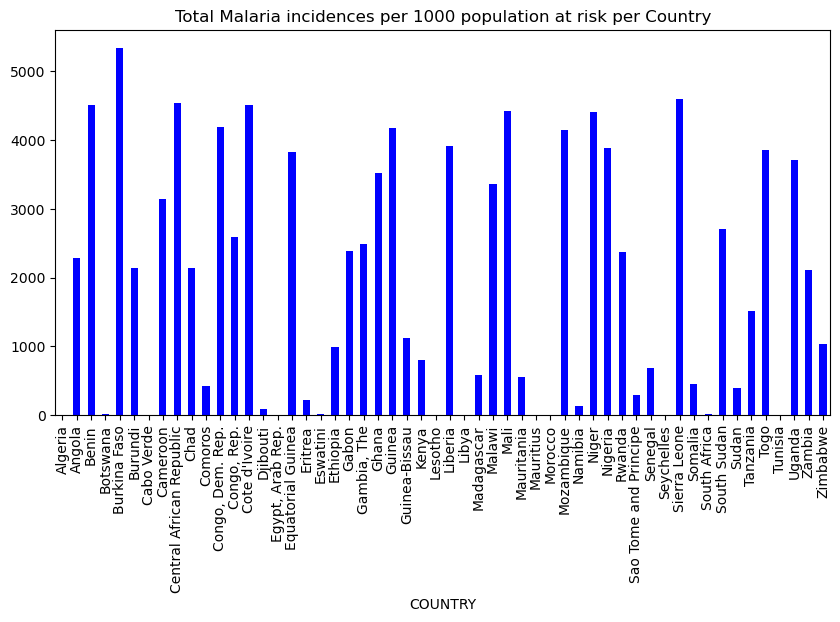

In [454]:
# Filter and group data by Country
total_incidences_per_country = df[['Country', 'Incidences_per_1000_population_at_risk']].groupby('Country').sum()
# generate graph
graph_1 = total_incidences_per_country.plot(kind='bar', align='center', figsize=[10,5], color='Blue', legend=False, 
                                                         title='Total Malaria incidences per 1000 population at risk per Country',
                                                         ).set_xlabel('COUNTRY')
graph_1

Horizontal bar graph showing the top 10 countries with the highest malaria incidences per 1000 population at risk & a Horizontal bar graph showing the top 10 countries with the lowest malaria incidences per 1000 population at risk

Objective: Identify countries with the highest and lowest number of Incidences, aiding in targeting interventions and allowing international organizations and donors prioritize resource allocation.


Text(0.5, 0, 'TOTAL INCIDENCES PER 1000 POPULATION AT RISK')

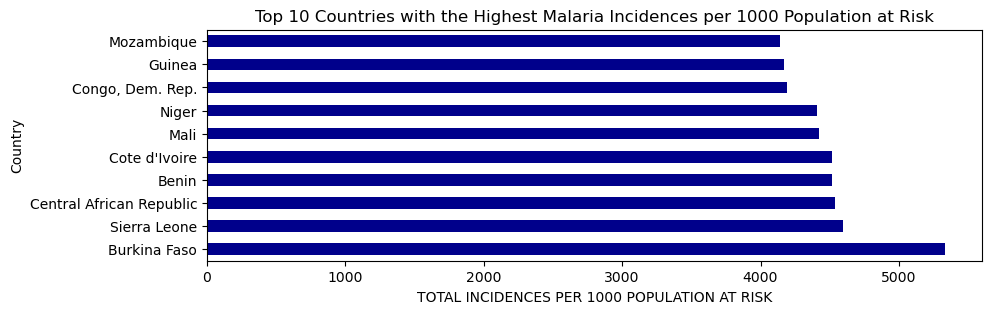

In [435]:
highest_incidences = total_incidences_per_country.sort_values(by='Incidences_per_1000_population_at_risk', ascending=False).head(10)
graph_2 = highest_incidences.plot(kind='barh', align='center', figsize=[10,3], color='Darkblue', legend=False, 
                                                         title='Top 10 Countries with the Highest Malaria Incidences per 1000 Population at Risk',
                                                         ).set_xlabel('TOTAL INCIDENCES PER 1000 POPULATION AT RISK')
graph_2

Text(0.5, 0, 'TOTAL INCIDENCES PER 1000 POPULATION AT RISK')

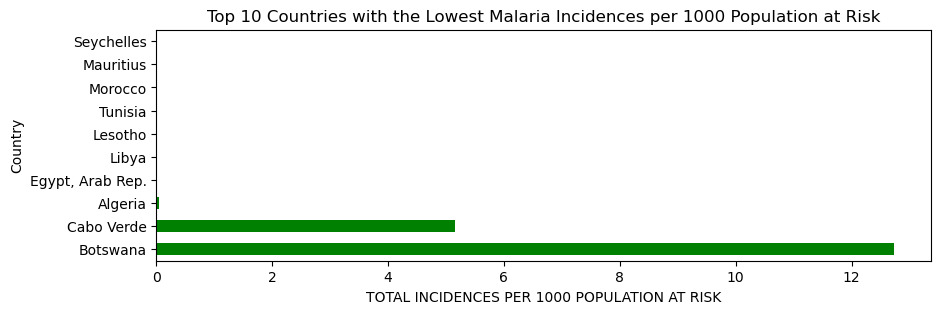

In [455]:
lowest_incidences = total_incidences_per_country.sort_values(by='Incidences_per_1000_population_at_risk', ascending=False).tail(10)
graph_3 = lowest_incidences.plot(kind='barh', align='center', figsize=[10,3], color='green', legend=False, 
                                                         title='Top 10 Countries with the Lowest Malaria Incidences per 1000 Population at Risk',
                                                         ).set_xlabel('TOTAL INCIDENCES PER 1000 POPULATION AT RISK')
graph_3

Maps showing the location of the top 10 countries with the highest malaria incidence per 1000 population at risk and also the location of the top 10 countries with the lowest malaria incidence per 1000 population at risk.

Objective: Assess the impact of geographical location and influence of climate on malaria incidence.

We observed that most of the countries with the lowest malaria incidences per 1000 population at risk are located in the Northern part of the African continent characterized by a predominantly arid or semi-arid climate with relatively low humidity. The combination of low humidity and limited precipitation in these regions creates less favorable conditions for sustained mosquito breeding, contributing to their low incidence of malaria.

We also observed that most of the countries with the highest malaria incidences per 1000 population at risk are located in the Equatorial region characterized by warm temperatures and heavy rainfall throughout the year which create ideal breeding places for mosquitoes, contributing to their high incidences of malaria.

In [437]:
# Obtain total number of incidences per country
total_incidences_per_country = df[['Country', 'Incidences_per_1000_population_at_risk']].groupby('Country').sum().reset_index()
# Sort rows  in ascending order based on Incidences_per_1000_population_at_risk
highest_incidences = total_incidences_per_country.sort_values(by = 'Incidences_per_1000_population_at_risk',ascending=False).head(10)
# Generate map
fig = px.choropleth(highest_incidences,
                     locations='Country',
                     color='Country',
                     color_continuous_scale='thermal',
                     locationmode='country names',scope='africa',
                     title="Geographical location of Countries with the highest Malaria Incidences per 1000 population at risk.",
                     labels={'color':'Countries'})

print('We can see that, most of the countries with the highest Malaria Incidences are located in the Equatorial region, that favours mosquito breeding.')
fig.show()


We can see that, most of the countries with the highest Malaria Incidences are located in the Equatorial region, that favours mosquito breeding.


In [438]:
lowest_incidences = total_incidences_per_country.sort_values(by = 'Incidences_per_1000_population_at_risk',ascending=False).tail(10)
fig1 = px.choropleth(lowest_incidences,
                     locations='Country',
                     color='Country',
                     color_continuous_scale='thermal',
                     locationmode='country names',scope='africa',
                     title="Geographical location of Countries with the lowest Malaria Incidences per 1000 population at risk.",
                     labels={'color':'Countries'})

print("We can see that, most of the countries with the lowest Malaria Incidences are located in Northern Africa, a region with Arid climate.")
print('Arid climate does not favour mosquito breeding.')
fig1.show()

We can see that, most of the countries with the lowest Malaria Incidences are located in Northern Africa, a region with Arid climate.
Arid climate does not favour mosquito breeding.


Time series line chart showing the trend in the Incidences of malaria per 1000 population at risk over the years

Objective: To track and visualize the trend of malaria incidence over the years and evaluate the effectiveness of existing malaria control and prevention interventions.

There is a clear downtrend indicating that the malaria control and prevention interventions are effective.


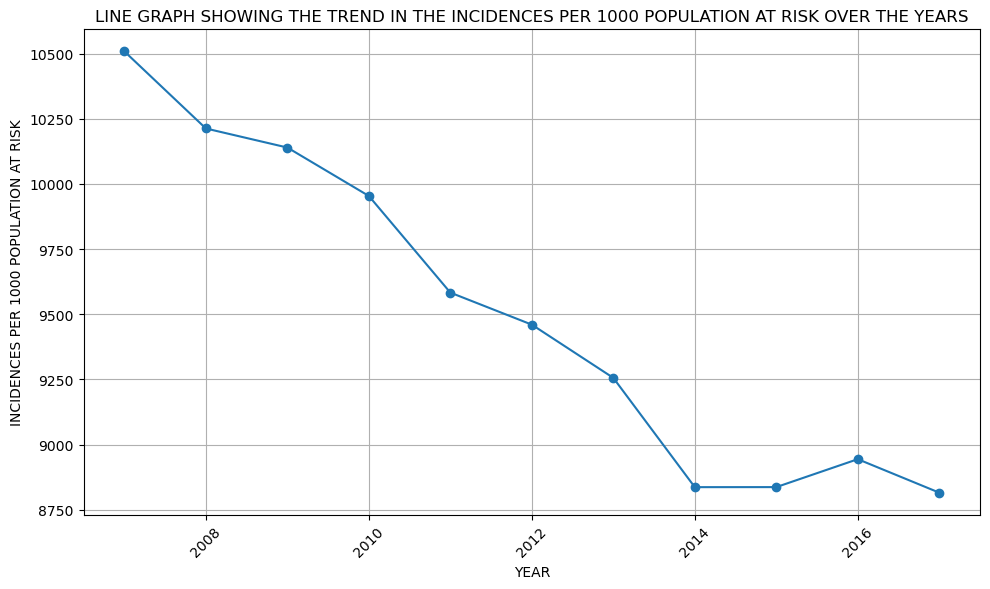

In [439]:
total_incidences_per_year = df[['Year', 'Incidences_per_1000_population_at_risk']].groupby('Year').sum()

plt.figure(figsize=(10, 6))  
plt.plot(total_incidences_per_year.index, total_incidences_per_year.values, marker='o', linestyle='-')
plt.xlabel('YEAR')
plt.ylabel('INCIDENCES PER 1000 POPULATION AT RISK')
plt.title('LINE GRAPH SHOWING THE TREND IN THE INCIDENCES PER 1000 POPULATION AT RISK OVER THE YEARS')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.grid(True)

print('There is a clear downtrend indicating that the malaria control and prevention interventions are effective.')

plt.show()

Time series line chart showing the trend in the Usage of insecticide-treated bed nets for children under the age of 5 over the years

Objective: Assess the effectiveness of malaria prevention campaigns and programs promoting bed net usage for children under the age of 5 years.

A clear uptrend is seen indicating effective malaria prevention campaigns and programs.


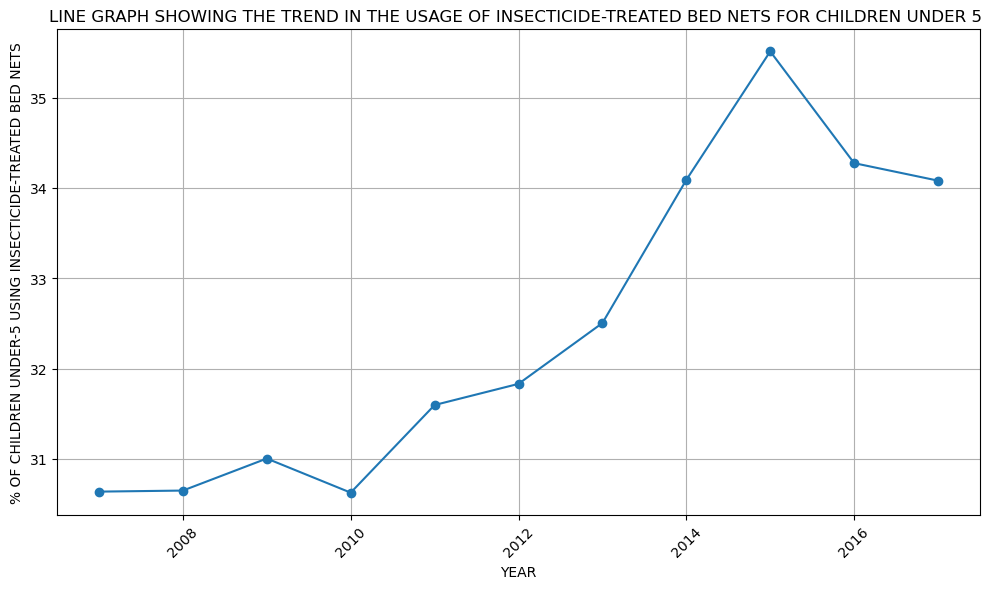

In [440]:
annual_bed_net_coverage = df[['Year', '%_using_IBNs']].groupby('Year').mean()

plt.figure(figsize=(10, 6))  
plt.plot(annual_bed_net_coverage.index, annual_bed_net_coverage.values, marker='o', linestyle='-')
plt.xlabel('YEAR')
plt.ylabel('% OF CHILDREN UNDER-5 USING INSECTICIDE-TREATED BED NETS')
plt.title('LINE GRAPH SHOWING THE TREND IN THE USAGE OF INSECTICIDE-TREATED BED NETS FOR CHILDREN UNDER 5 ')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.grid(True)  

print('A clear uptrend is seen indicating effective malaria prevention campaigns and programs.')

plt.show()

Horizontal bar graph showing the top 10 countries with the lowest percentage of Children under 5 using insecticide-treated bed nets.

Objective: Identify countries with low bed net coverage targeting them for interventions to increase usage and reduce malaria transmission.



The top 10 countries with the lowest bed net coverage have one thing in common, that is, their climate(Arid Climate) does not favour mosquito breeding.
We therefore focused on countries whose climate favours mosquito breeding and also have low percentages if bed net usage for children under 5 years.

Text(0.5, 0, 'PERCENTAGE OF CHILDREN UNDER 5 YEARS USING INSECTICIDE-TREATED BED NETS (%) ')

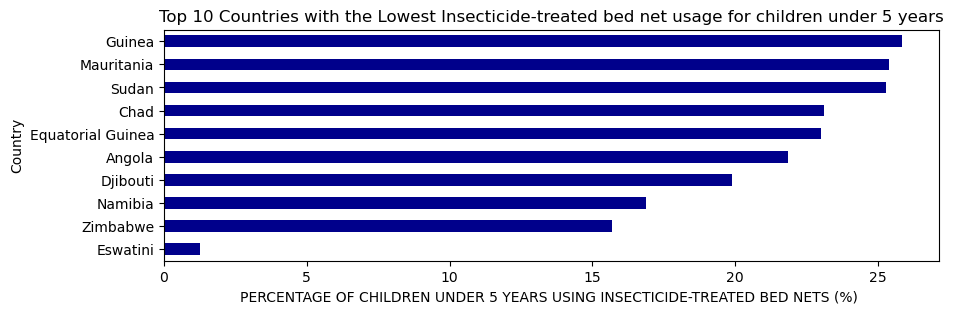

In [441]:
bed_net_usage_per_country = df[['Country', '%_using_IBNs']].groupby('Country').mean().sort_values(by = '%_using_IBNs', ascending=True)

required_data = bed_net_usage_per_country[bed_net_usage_per_country['%_using_IBNs'] != 0].head(10)

graph_4 = required_data.plot(kind='barh', align='center', figsize=[10,3], color='DarkBlue', legend=False, 
                                                         title='Top 10 Countries with the Lowest Insecticide-treated bed net usage for children under 5 years',
                                                         ).set_xlabel('PERCENTAGE OF CHILDREN UNDER 5 YEARS USING INSECTICIDE-TREATED BED NETS (%) ')
graph_4

Line graph showing the trend in percentage of children under-5 with fever receiving antimalarial treatment over the years, as well as, the trend in the percentage of children under-5 years using insecticide-treated bed nets.

Objective: Investigate the impact of Insecticide-treated bed net usage in children under 5 on the Percentages of Children with fever under 5 years/ Assess Malaria prevention measures in children under 5 years.

We observed an overall downtrend in the percentage of children under-5 with fever receiving antimalarial drugs and an overall uptrend in the percentage of children under-5  using insecticide-treated bed nets 

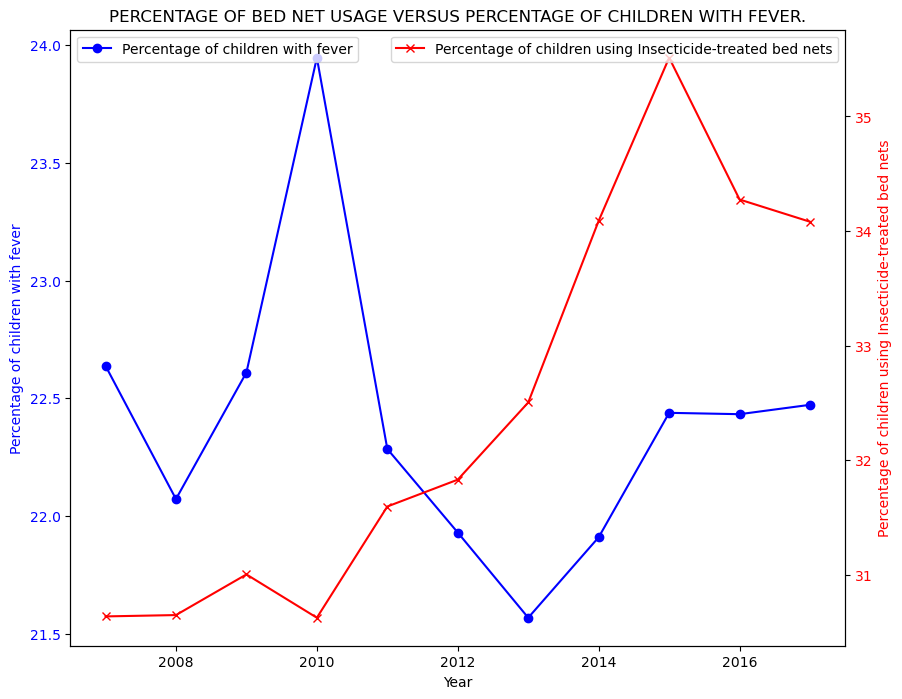

In [492]:
annual_antimalarial_coverage = df[['Year', '%_of_children_under_age_5_with_fever']].groupby('Year').mean()
# reset index
annual_antimalarial_coverage = annual_antimalarial_coverage.reset_index()
annual_bed_net_coverage = annual_bed_net_coverage.reset_index()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 8))

# Plot the trend of reported cases
ax1.plot(annual_antimalarial_coverage['Year'], annual_antimalarial_coverage['%_of_children_under_age_5_with_fever'], color='b', marker='o', label='Percentage of children with fever')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage of children with fever', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Create a second y-axis for population growth rate
ax2 = ax1.twinx()
ax2.plot(annual_bed_net_coverage['Year'], annual_bed_net_coverage['%_using_IBNs'], color='r', marker='x', label='Percentage of children using Insecticide-treated bed nets')
ax2.set_ylabel('Percentage of children using Insecticide-treated bed nets', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.legend(loc='upper right')

# Add title and show plot
plt.title('PERCENTAGE OF BED NET USAGE VERSUS PERCENTAGE OF CHILDREN WITH FEVER.')
plt.show()



Correlation heatmap showing the relationship between the percentages of children under-5 using Insecticide-treated bed nets and the percentages of children with fever

Onjective: Explore the relationship between between the use of Insecticide-treated bed nets and the percentages of ill children.

A Correlation coefficient of -0.29 indicates a moderate correlation between the percentages of children under-5 using Insecticide-treated bed nets and the percentagess of children with fever using correlation analysis.

Also, the negative sign indicates that as the usage of insecticide-treated bed nets increases, the incidence of sickness among children under 5 decreases. In other words, higher bed net usage is associated with lower incidence of sickness among children.

The correlation coefficient between the two columns is: -0.29


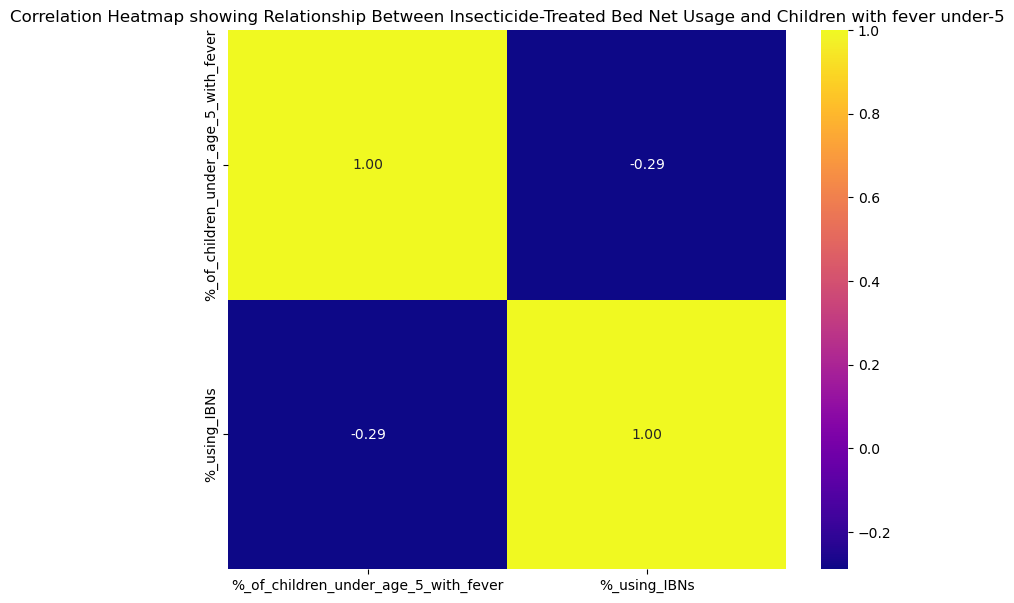

In [443]:
bed_net_usage_and_fever = df[['Year', '%_of_children_under_age_5_with_fever', '%_using_IBNs']].groupby('Year').mean()
# Correlation coefficient
print(f'The correlation coefficient between the two columns is: {round(bed_net_usage_and_fever.corr().iloc[0, 1], 2)}')
# Heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(bed_net_usage_and_fever.corr(), annot=True, cmap='plasma', fmt='.2f')
plt.title("Correlation Heatmap showing Relationship Between Insecticide-Treated Bed Net Usage and Children with fever under-5")
plt.show()


Bar graph showing the Percentage of Pregnant women using IPT per country

Objective: Examine the coverage and implementation of Intermittent preventative treatment for pregnant women, crucial for preventing malaria related complications during pregnancy.

The varying bar lengths emphasize disparities in IPT coverage and the need for targeted interventions.

The lower bars signify a potential lack of awareness, accessibility, or adoption of IPT services. 

Text(0.5, 0, 'COUNTRY')

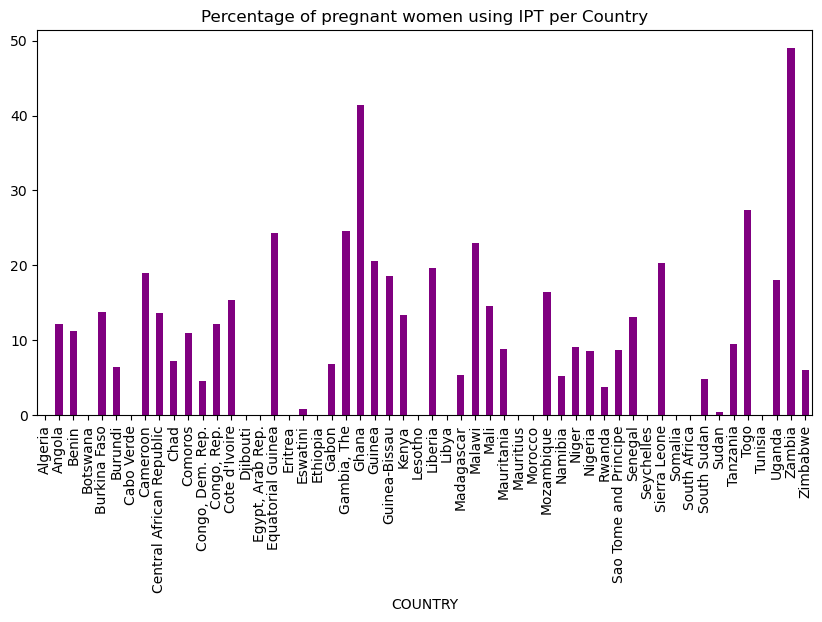

In [444]:
using_ipt_per_country = df[['Country', '%_of_pregnant_women_using_IPT']].groupby('Country').mean()
# generate graph
graph_5 = using_ipt_per_country.plot(kind='bar', align='center', figsize=[10,5], color='purple', legend=False, 
                                                         title='Percentage of pregnant women using IPT per Country',
                                                         ).set_xlabel('COUNTRY')
graph_5

Line chart showing the trend in the usage of IPT among pregnant women over the years.

Objective: Assess the adoption of Intermittent Preventative treatment (IPT) over the years as a preventative measure against malaria among pregnant women.

The uptrend suggests that efforts to promote and increase the utilization of IPT have been effective. More pregnant women are receiving this preventive treatment, which is likely contributing to a reduction in malaria-related health risks among this vulnerable population.

This visual trend effectively conveys the increasing acceptance and utilization of IPT as a preventive strategy.


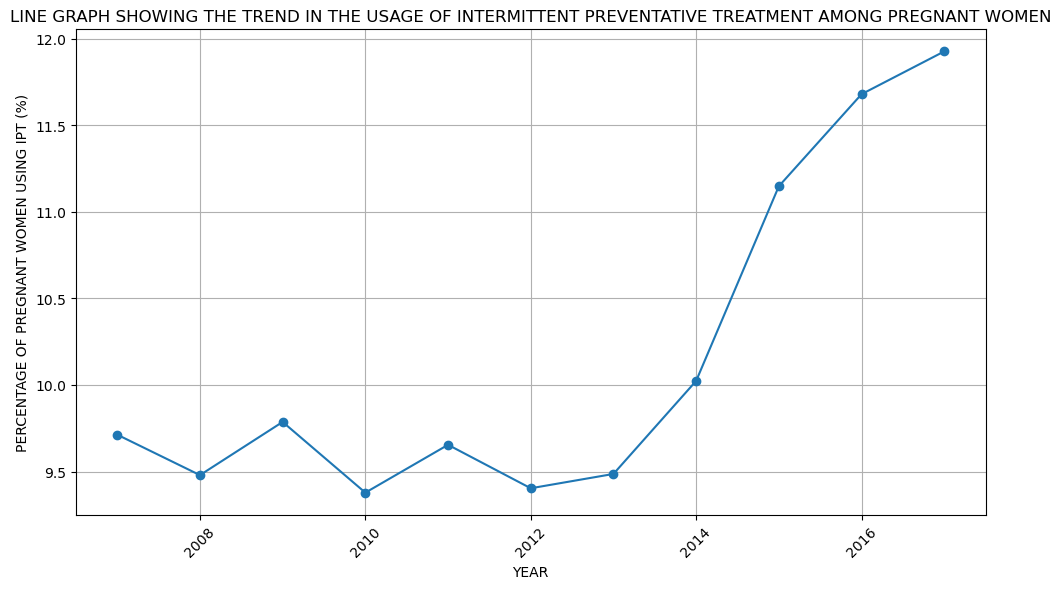

In [445]:
using_ipt_per_year = df[['Year', '%_of_pregnant_women_using_IPT']].groupby('Year').mean()

plt.figure(figsize=(10, 6))  
plt.plot(using_ipt_per_year.index, using_ipt_per_year.values, marker='o', linestyle='-')
plt.xlabel('YEAR')
plt.ylabel('PERCENTAGE OF PREGNANT WOMEN USING IPT (%)')
plt.title('LINE GRAPH SHOWING THE TREND IN THE USAGE OF INTERMITTENT PREVENTATIVE TREATMENT AMONG PREGNANT WOMEN')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.grid(True)  

print('This visual trend effectively conveys the increasing acceptance and utilization of IPT as a preventive strategy.')

plt.show()

Bar graph showing the top 10 countries with the lowest levels of IPT usage among pregnant women

Objective: Identify regions with lower IPT coverage, requiring targeted efforts to improve maternal and child health outcomes.

Note that countries whose climate has a major contribution to the low numbers were ignored. Such countries include Algeria, Morocco, Tunisia, Egypt, Somalia among others. These countries don't really suffer from the malaria burden which explains the low numbers for the various malaria control and prevention measures.

Text(0.5, 0, 'PERCENTAGE OF PREGNANT WOMEN USING IPT (%)')

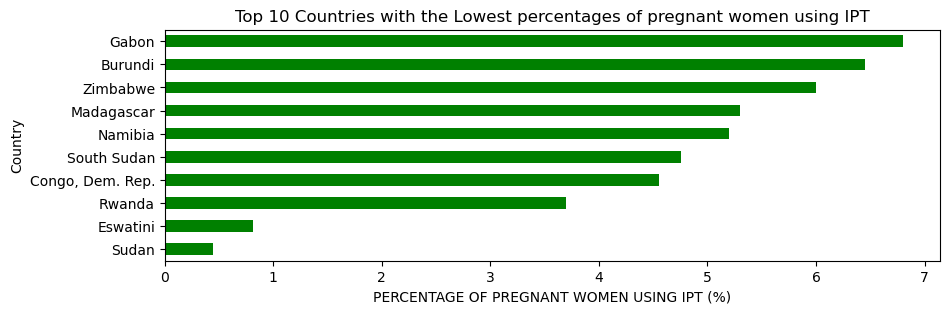

In [446]:
ipt_usage_per_country = df[['Country', '%_of_pregnant_women_using_IPT']].groupby('Country').mean().sort_values(by = '%_of_pregnant_women_using_IPT', ascending=True)
# removing rows where values are 0.
required_data = ipt_usage_per_country[ipt_usage_per_country['%_of_pregnant_women_using_IPT'] != 0].head(10)
# generating bar plot
graph_6 = required_data.plot(kind='barh', align='center', figsize=[10,3], color='green', legend=False, 
                                                         title='Top 10 Countries with the Lowest percentages of pregnant women using IPT',
                                                         ).set_xlabel('PERCENTAGE OF PREGNANT WOMEN USING IPT (%)')
graph_6

Correlation heatmap showing the relationship between Percentage of pregnant women using IPT and malaria incidences per 1000 population at risk.

Objective: Explore the relationship between Percentage of pregnant women using IPT and malaria incidences.

The value of -0.67 suggests that there is a moderate negative correlation between the Percentage of pregnant women using IPT and malaria incidences. As the use of IPT among pregnant women increases, the incidences of malaria per 1000 population at risk tend to decrease.

The correlation coefficient between the two columns is: -0.67


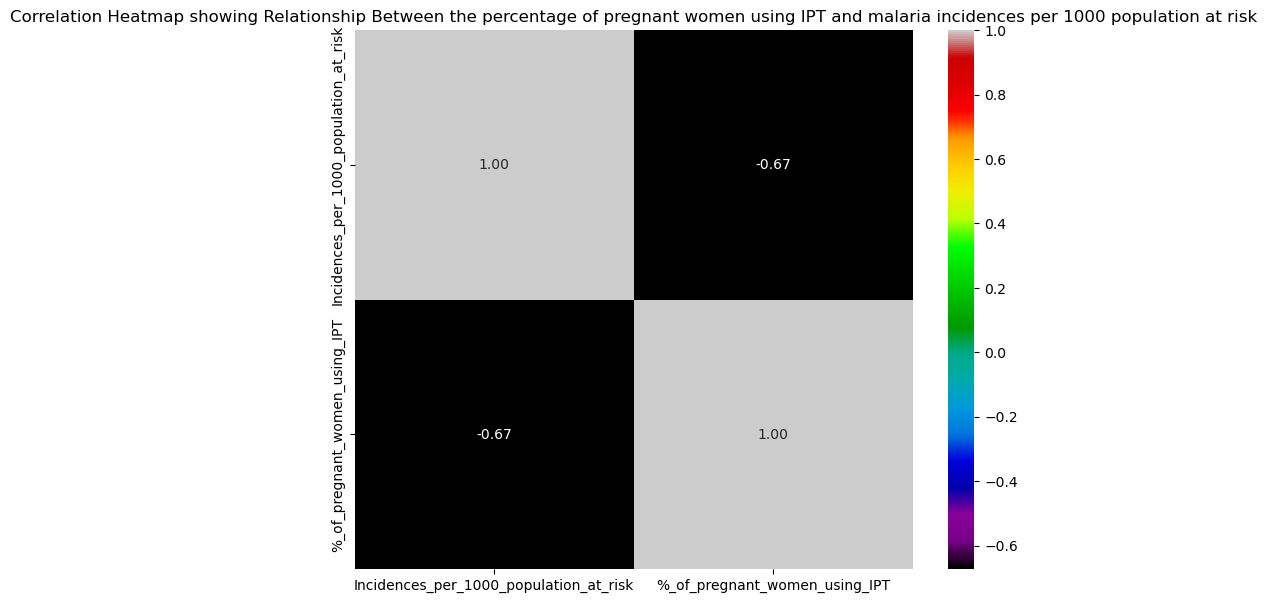

In [447]:
incidences_and_ipt = df[['Year', 'Incidences_per_1000_population_at_risk', '%_of_pregnant_women_using_IPT']].groupby('Year').mean()
# Correlation coefficient
print(f'The correlation coefficient between the two columns is: {round(incidences_and_ipt.corr().iloc[0, 1], 2)}')
# Heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(incidences_and_ipt.corr(), annot=True, cmap='nipy_spectral', fmt='.2f')
plt.title("Correlation Heatmap showing Relationship Between the percentage of pregnant women using IPT and malaria incidences per 1000 population at risk")
plt.show()

Kernel Density Estimate (KDE) plot to visualize the probability distribution of malaria incidences across African countries.

Objective: Showcase the distribution of malaria incidences across African countries, identifying patterns and potential outliers.

We observed a **bimodal distribution**. The two peaks in the distribution highlight the fact that malaria incidence rates vary significantly among African countries. It prompts a deeper exploration into the factors contributing to the dichotomy between nations with low and high malaria burdens.

The first peak, situated at the lower end of the distribution, corresponds to countries with notably low malaria incidence rates. As we saw earlier, he low incidence rates observed in this peak may be attributed to factors such as geographical location.

Conversely, the second peak, located at the higher end of the distribution, signifies countries grappling with a higher burden of malaria

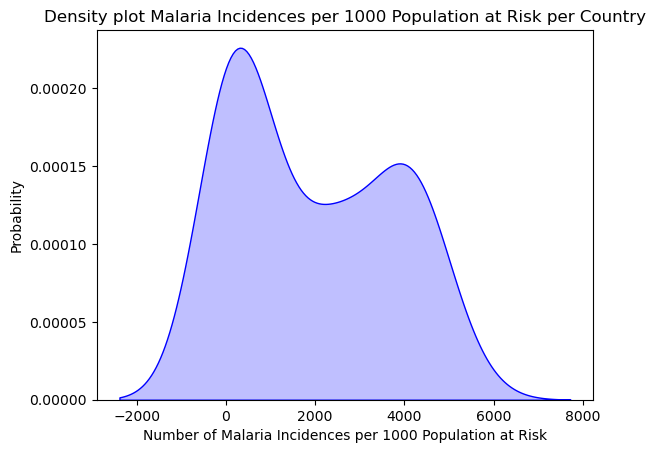

In [448]:
# Density plot for division one
sns.kdeplot(total_incidences_per_country['Incidences_per_1000_population_at_risk'], fill=True, color='Blue')
plt.xlabel('Number of Malaria Incidences per 1000 Population at Risk')
plt.ylabel('Probability')
plt.title('Density plot Malaria Incidences per 1000 Population at Risk per Country')
# Display the plot
plt.show()


 Correlation heatmap showing the relationship between the use of basic sanitation services and incidences of malaria

 Objective: Exploring the Relationship Between the use of Basic Sanitation Services and Malaria Incidences.
 
The value of -0.98 suggests that there is a strong negative correlation between the use of basic sanitation services and malaria incidence. As the use of basic sanitation services increases, the incidences of malaria per 1000 population at risk tends to decrease.

Correlation Coefficient between the two columns is: -0.98


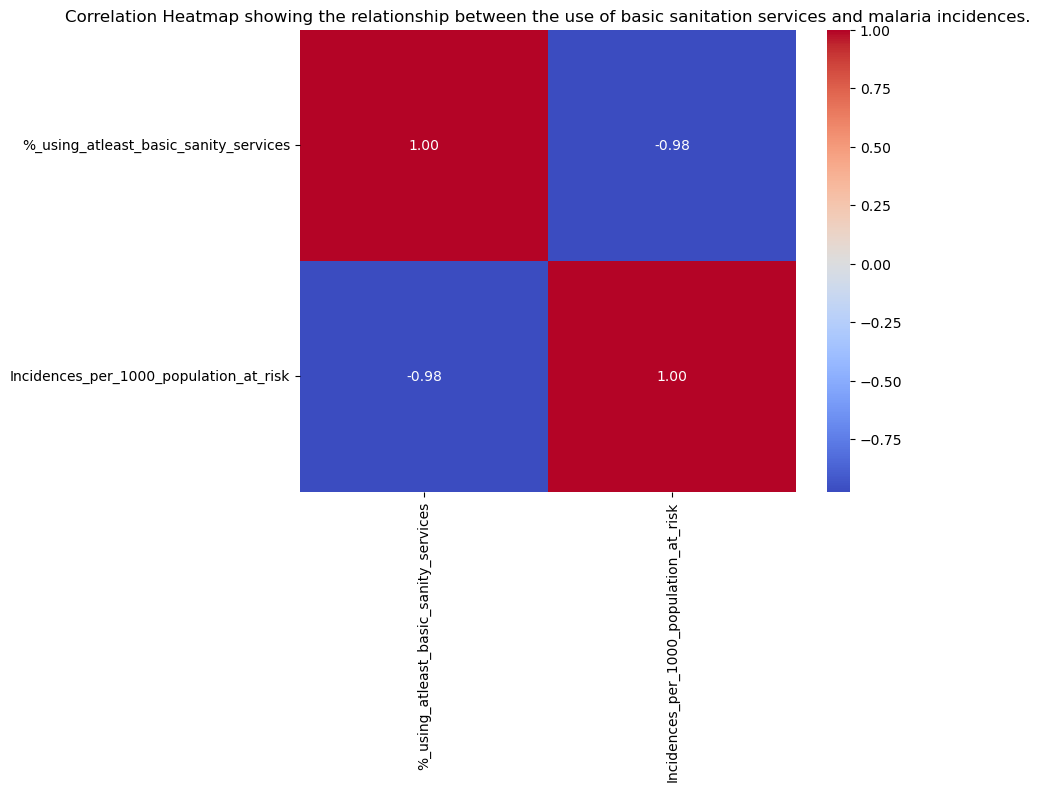

In [449]:
# Select the columns 
sanity_services_and_incidences = df[['Year','%_using_atleast_basic_sanity_services', 'Incidences_per_1000_population_at_risk']].groupby('Year').mean()
# Correlation coefficient
print(f"Correlation Coefficient between the two columns is: {round(sanity_services_and_incidences.corr().iloc[0, 1], 2)}")

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(sanity_services_and_incidences.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap showing the relationship between the use of basic sanitation services and malaria incidences.")
plt.show()

Correlation heatmap showing the relationship between the percentage of people using basic drinking water services and the number of malaria incidences.

Objective: Explore the relationship between the use of basic drinking water services and malaria incidences.

The value of -0.98 suggests that there is a strong negative correlation between the use of basic drinking water services and malaria incidence. As the use of basic drinking water services increases, the incidences of malaria per 1000 population at risk tends to decrease.

Correlation Coefficient between Percentage of people using basic drinking water services and Incidences of Malaria:      -0.98


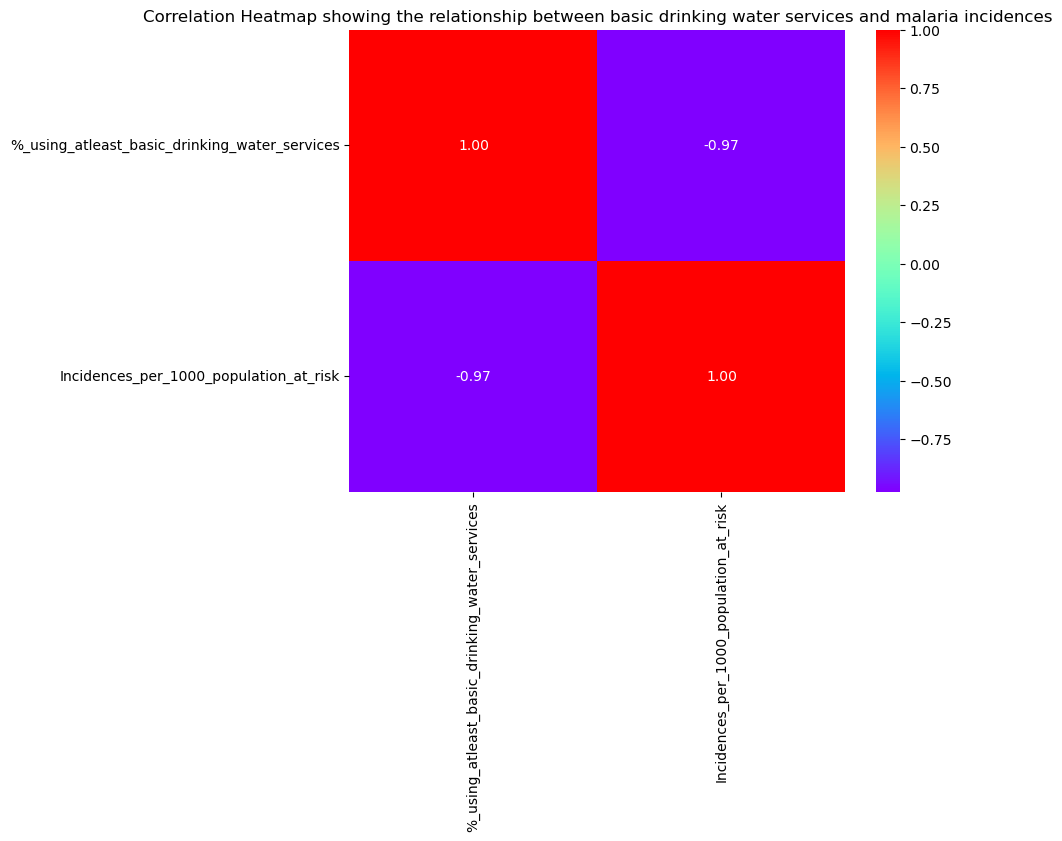

In [450]:
# Correlation Analysis# Select columns
drinking_water_and_incidences = df[['Year','%_using_atleast_basic_drinking_water_services', 'Incidences_per_1000_population_at_risk']].groupby('Year').mean()

# Print the correlation coefficient
print(f"Correlation Coefficient between Percentage of people using basic drinking water services and Incidences of Malaria:\
      {round(sanity_services_and_incidences.corr().iloc[0, 1], 2)}")

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(drinking_water_and_incidences.corr(), annot=True, cmap='rainbow', fmt='.2f')
plt.title("Correlation Heatmap showing the relationship between basic drinking water services and malaria incidences")
plt.show()


Bar graph showing the number of reported cases per country.

Objective: Compare the reporting and surveillance systems for malaria across the African countries.

Text(0.5, 0, 'COUNTRY')

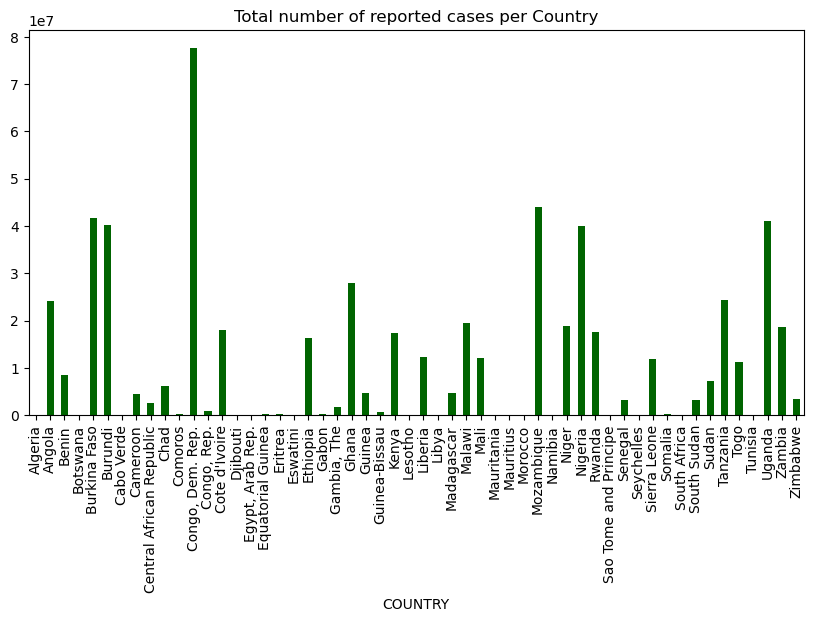

In [451]:
reported_cases_per_country = df[['Country', 'Reported_cases']].groupby('Country').sum()
# generate graph
graph_7 = reported_cases_per_country.plot(kind='bar', align='center', figsize=[10,5], color='darkGreen', legend=False, 
                                                         title='Total number of reported cases per Country',
                                                         ).set_xlabel('COUNTRY')
graph_7

Line graph showing the trends of reported cases vs incidences per 1000 population at risk.

Objective: Assess the extent to which reported cases accurately reflect the true burden of malaria in the country with the highest number of reported cases.

From the graph below, as the number of Incidences per 1000 population at risk decreases, the number of reported cases increases. Therefore, reported cases do not accurately reflect the true burden of malaria in the country.

The increase in reported cases may be attributed to improvements in disease reporting, surveillance systems, and diagnostic methods.

Also, if the overall population of a region is increasing, even if the disease incidence remains stable or decreases, the absolute number of cases reported will still increase.

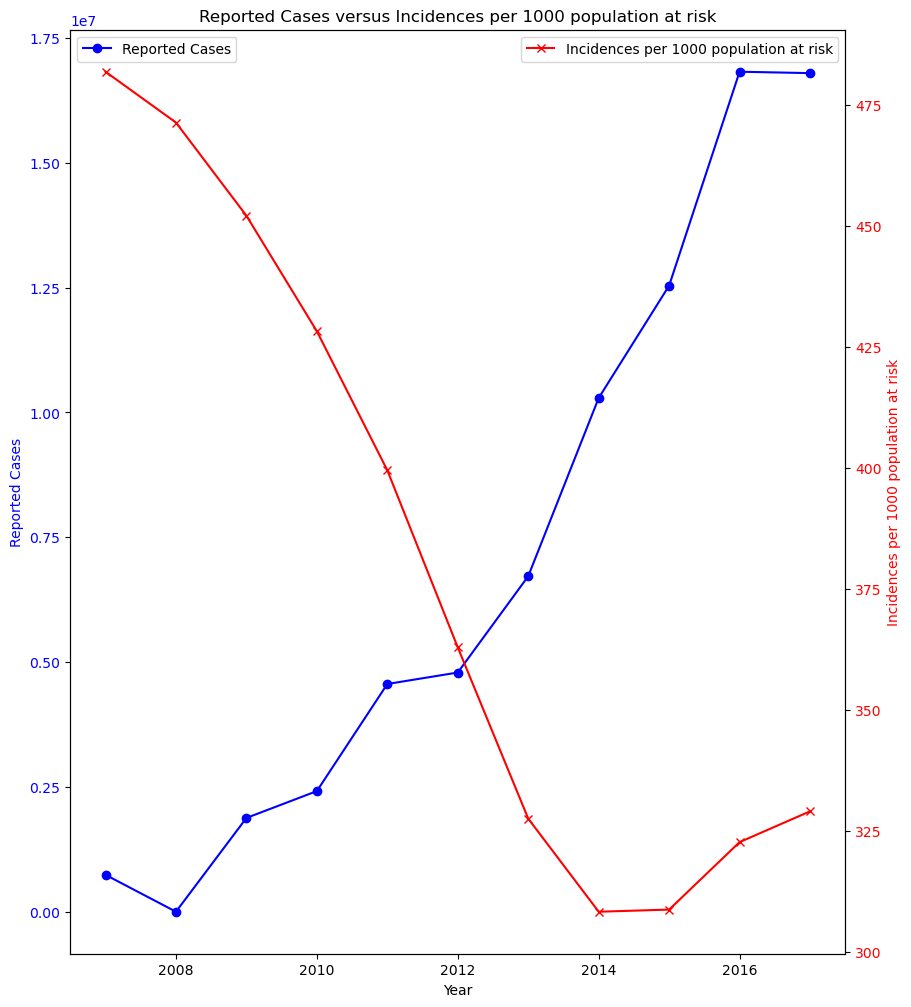

In [486]:
congo = df[df['Country'] == 'Congo, Dem. Rep.']

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 12))

# Plot the trend of reported cases
ax1.plot(congo['Year'], congo['Reported_cases'], color='b', marker='o', label='Reported Cases')
ax1.set_xlabel('Year')
ax1.set_ylabel('Reported Cases', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Create a second y-axis for population growth rate
ax2 = ax1.twinx()
ax2.plot(congo['Year'], congo['Incidences_per_1000_population_at_risk'], color='r', marker='x', label='Incidences per 1000 population at risk')
ax2.set_ylabel('Incidences per 1000 population at risk', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.legend(loc='upper right')

# Add title and show plot
plt.title('Reported Cases versus Incidences per 1000 population at risk')
plt.show()


A visual representation of the malaria burden across African countries, highlighting malaria hotspots.

In [452]:
fig1 = px.choropleth(df,
                     locations=df['Country Code'],
                     color=df['Incidences_per_1000_population_at_risk'],
                     color_continuous_scale='Blues',
                     locationmode='ISO-3',scope='africa',
                     animation_frame=df['Year'],
                     title="Malaria Incidence per 1000 Population at Risk Across African Countries (Year) ",
                     labels={'color':'Incidence of Malaria'})

fig1.show()

In [453]:
import scipy.stats as stats

# Select the columns
columns = ['%_of_rural_population', '%_of_urban_population',
            '%_using_atleast_basic_drinking_water_services', '%_using_atleast_basic_sanity_services',
           'Incidences_per_1000_population_at_risk']

subset_data = df[columns]

# Perform t-test to compare malaria incidence between urban and rural populations
urban_data = subset_data[subset_data['%_of_urban_population'] > 0]
rural_data = subset_data[subset_data['%_of_rural_population'] > 0]

t_stat_incidence, p_value_incidence = stats.ttest_ind(urban_data['Incidences_per_1000_population_at_risk'],
                                                      rural_data['Incidences_per_1000_population_at_risk'])

print("T-Statistic (Malaria Incidence):", t_stat_incidence)
print("P-Value (Malaria Incidence):", p_value_incidence)

# Perform t-test to compare access to basic drinking water services between urban and rural populations
t_stat_water, p_value_water = stats.ttest_ind(urban_data['%_using_atleast_basic_drinking_water_services'],
                                              rural_data['%_using_atleast_basic_drinking_water_services'])

print("T-Statistic (Access to Basic Drinking Water Services):", t_stat_water)
print("P-Value (Access to Basic Drinking Water Services):", p_value_water)

# Perform t-test to compare access to basic sanitation services between urban and rural populations
t_stat_sanitation, p_value_sanitation = stats.ttest_ind(urban_data['%_using_atleast_basic_sanity_services'],
                                                        rural_data['%_using_atleast_basic_sanity_services'])

print("T-Statistic (Access to Basic Sanitation Services):", t_stat_sanitation)
print("P-Value (Access to Basic Sanitation Services):", p_value_sanitation)


T-Statistic (Malaria Incidence): 0.0
P-Value (Malaria Incidence): 1.0
T-Statistic (Access to Basic Drinking Water Services): 0.0
P-Value (Access to Basic Drinking Water Services): 1.0
T-Statistic (Access to Basic Sanitation Services): 0.0
P-Value (Access to Basic Sanitation Services): 1.0
